In [1]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random lat and long combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities 
cities = []
# ID the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # if city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
# print the city count ot confirm sufficient count
len(cities)

650

## 6.2.6 Get City Weather Data
1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the 'city_url' or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data
import requests
from config import weather_api_key
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# 2.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | yarada
Processing Record 5 of Set 1 | kharp
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | beeskow
Processing Record 9 of Set 1 | mbekenyera
Processing Record 10 of Set 1 | abnub
Processing Record 11 of Set 1 | mehamn
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | grand-santi
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | santa cruz cabralia
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | wahran
City not found. Skipping...
Processing Record 19 of Set 1 | ambilobe
Processing Record 20 of Set 1 | ashqelon
Processing Record 21 of Set 1 | bambous virieux
Pro

Processing Record 35 of Set 4 | cienfuegos
Processing Record 36 of Set 4 | lagos
Processing Record 37 of Set 4 | araouane
Processing Record 38 of Set 4 | quatre cocos
Processing Record 39 of Set 4 | amparafaravola
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | nisia floresta
Processing Record 42 of Set 4 | ongandjera
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | havoysund
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | porto novo
Processing Record 47 of Set 4 | pedernales
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | olden
Processing Record 50 of Set 4 | cradock
Processing Record 1 of Set 5 | talas
Processing Record 2 of Set 5 | carutapera
Processing Record 3 of Set 5 | kuruman
Processing Record 4 of Set 5 | kaniama
Processing Record 5 of Set 5 | moyo
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | marsh harbour
Processing Record 8 of Set 5 | gerash
Proces

Processing Record 27 of Set 8 | umea
Processing Record 28 of Set 8 | damavand
Processing Record 29 of Set 8 | leh
Processing Record 30 of Set 8 | arlit
Processing Record 31 of Set 8 | rzhev
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | villa carlos paz
Processing Record 34 of Set 8 | mehriz
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | nacala
Processing Record 37 of Set 8 | doha
Processing Record 38 of Set 8 | diapaga
Processing Record 39 of Set 8 | alenquer
Processing Record 40 of Set 8 | izmalkovo
Processing Record 41 of Set 8 | karasjok
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | inyonga
Processing Record 44 of Set 8 | sao joao da barra
Processing Record 45 of Set 8 | thompson
Processing Record 46 of Set 8 | bonaventure
Processing Record 47 of Set 8 | mahibadhoo
Processing Record 48 of Set 8 | porto velho
Processing Record 49 of Set 8 | itaituba
Processing Record 50 of Set 8 

Processing Record 14 of Set 12 | acurenam
Processing Record 15 of Set 12 | kurovskoye
Processing Record 16 of Set 12 | la palma
Processing Record 17 of Set 12 | richards bay
Processing Record 18 of Set 12 | svetlogorsk
Processing Record 19 of Set 12 | saint-augustin
Processing Record 20 of Set 12 | dondukovskaya
Processing Record 21 of Set 12 | huarmey
Processing Record 22 of Set 12 | zabol
Processing Record 23 of Set 12 | isla mujeres
Processing Record 24 of Set 12 | bara
Processing Record 25 of Set 12 | talara
Processing Record 26 of Set 12 | adrar
Processing Record 27 of Set 12 | mao
Processing Record 28 of Set 12 | abha
Processing Record 29 of Set 12 | bull savanna
Processing Record 30 of Set 12 | durazno
Processing Record 31 of Set 12 | harer
Processing Record 32 of Set 12 | orsha
Processing Record 33 of Set 12 | awbari
Processing Record 34 of Set 12 | bahar
Processing Record 35 of Set 12 | vastervik
City not found. Skipping...
Processing Record 36 of Set 12 | nantucket
Processing

In [9]:
len(city_data)

594

In [16]:
# 8. creating a data frame (6.2.7)
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.80,78,75,4.61,RE,2021-03-29 18:14:44
1,Hithadhoo,-0.6000,73.0833,83.82,74,100,24.85,MV,2021-03-29 18:14:45
2,Sao Felix Do Xingu,-6.6447,-51.9950,84.60,68,98,2.01,BR,2021-03-29 18:14:46
3,Yarada,17.6500,83.2667,81.23,82,9,11.79,IN,2021-03-29 18:14:48
4,Kharp,66.8014,65.8081,17.20,96,100,2.59,RU,2021-03-29 18:14:52
5,Upernavik,72.7868,-56.1549,0.30,60,96,5.86,GL,2021-03-29 18:14:52
6,Victoria,22.2855,114.1577,78.01,87,44,1.01,HK,2021-03-29 18:10:41
7,Beeskow,52.1667,14.2500,59.00,47,97,1.99,DE,2021-03-29 18:14:53
8,Mbekenyera,-10.0000,38.9833,70.83,97,99,3.38,TZ,2021-03-29 18:14:53
9,Abnub,27.2696,31.1511,66.20,45,0,16.11,EG,2021-03-29 18:14:53


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-03-29 18:14:44,-21.3585,55.7679,78.80,78,75,4.61
1,Hithadhoo,MV,2021-03-29 18:14:45,-0.6000,73.0833,83.82,74,100,24.85
2,Sao Felix Do Xingu,BR,2021-03-29 18:14:46,-6.6447,-51.9950,84.60,68,98,2.01
3,Yarada,IN,2021-03-29 18:14:48,17.6500,83.2667,81.23,82,9,11.79
4,Kharp,RU,2021-03-29 18:14:52,66.8014,65.8081,17.20,96,100,2.59
5,Upernavik,GL,2021-03-29 18:14:52,72.7868,-56.1549,0.30,60,96,5.86
6,Victoria,HK,2021-03-29 18:10:41,22.2855,114.1577,78.01,87,44,1.01
7,Beeskow,DE,2021-03-29 18:14:53,52.1667,14.2500,59.00,47,97,1.99
8,Mbekenyera,TZ,2021-03-29 18:14:53,-10.0000,38.9833,70.83,97,99,3.38
9,Abnub,EG,2021-03-29 18:14:53,27.2696,31.1511,66.20,45,0,16.11


In [18]:
# Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

### 6.3.1 Plotting data

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

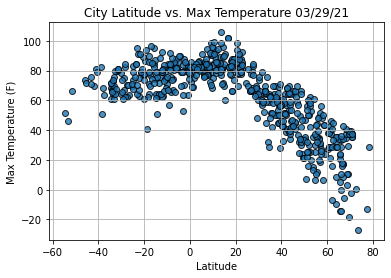

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

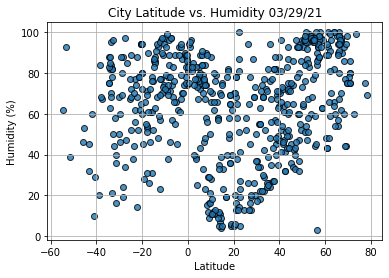

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()